# **Task 2 : Prediction using Unsupervised ML**

From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

### **- SRUTHI B**


**Import all the required libraries**

In [1]:
import pandas as pd                                           # for reading the dataset
from sklearn.model_selection import train_test_split          # to split the dataset into training and test set 
from sklearn.linear_model import LinearRegression             # Linear Regression Model
import matplotlib.pyplot as plt                               # to plot the dataset and regression line
from sklearn.datasets import load_iris                        # to load in-built iris dataset

**Reading the dataset using URL**

In [2]:
iris_dataset = load_iris()
print('Dataset imported successfully')

Dataset imported successfully


**Converting into pandas data frame**

In [3]:
dataframe = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
dataframe.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
130,7.4,2.8,6.1,1.9
69,5.6,2.5,3.9,1.1
31,5.4,3.4,1.5,0.4
145,6.7,3.0,5.2,2.3
34,4.9,3.1,1.5,0.2
123,6.3,2.7,4.9,1.8
128,6.4,2.8,5.6,2.1
52,6.9,3.1,4.9,1.5
117,7.7,3.8,6.7,2.2
4,5.0,3.6,1.4,0.2


**Preparing dataset**

In [4]:
x = dataframe.iloc[:, :].values
x.shape

(150, 4)

**Using the elbow method to find the optimal number of clusters**

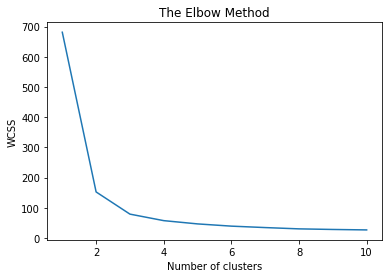

In [5]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0, max_iter = 300, n_init = 10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show() 

**Training the Model**

In [6]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
print('Training completed')

Training completed


**Visualising the Clusters**

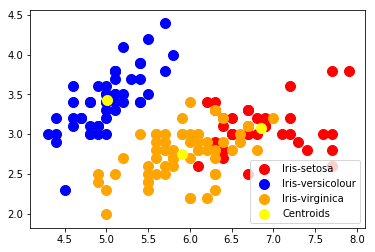

In [8]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'orange', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()